In [1]:
import pyaudio
import wave
import sys
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

import librosa
import librosa.display

import pylab

# recording configs
CHUNK = 2048
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 96000
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

# create & configure microphone
mic = pyaudio.PyAudio()
stream = mic.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)



# read & store microphone data per frame read
frames = []
trigger = 0
while trigger < 10000:
    dataTrig = stream.read(CHUNK)
    decoded = np.frombuffer(dataTrig,dtype=np.int16);
    trigger = np.amax(decoded)
    # display(trigger)
    sleep(0.001)

print("* recording")

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    numpydata = np.frombuffer(data,dtype=np.int16)
    frames.append(data)

print("* done recording")


# kill the mic and recording
stream.stop_stream()
stream.close()
mic.terminate()


* recording
* done recording


96000
[[-20625  -2860]
 [-19945   5443]
 [-17219  13025]
 ...
 [   393    536]
 [   185    537]
 [    -1    531]]
(110074,)
22050


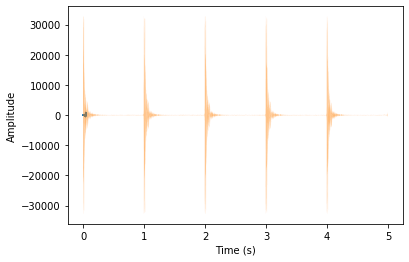

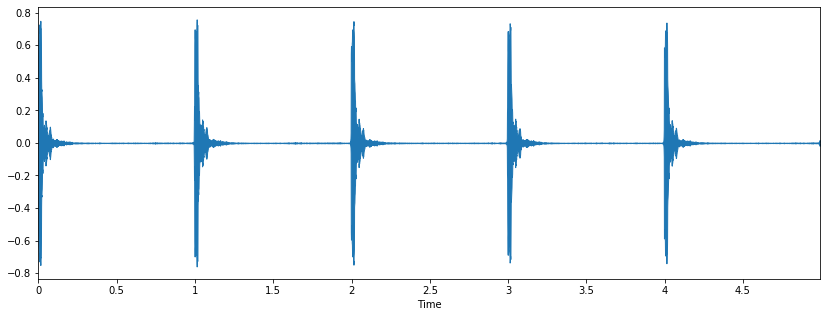

In [2]:
#combine & store all microphone data to output.wav file
outputFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
outputFile.setnchannels(CHANNELS)
outputFile.setsampwidth(mic.get_sample_size(FORMAT))
outputFile.setframerate(RATE)
outputFile.writeframes(b''.join(frames))
outputFile.close()


# Plot
time = np.arange(0, float(numpydata.shape[0]), 1) / RATE
plt.plot(time, numpydata)

# SciPy Import
import scipy.io.wavfile
rate,audData=scipy.io.wavfile.read('output.wav')

#the sample rate is the number of bits of infomration recorded per second
print(rate)
print(audData)

#wav bit type the amount of information recorded in each bit often 8, 16 or 32 bit
audData.dtype

#wav length
audData.shape[0] / rate

#wav number of channels mono/stereo 
audData.shape[1]

#if stereo grab both channels
channel1=audData #left 
# channel2=audData[:,1] #right

# FFT
from numpy import fft as fft

# fourier=fft.fft(channel1)

# plt.plot(fourier, color='#ff7f00')
# plt.xlabel('k')
# plt.ylabel('Amplitude')

time = np.arange(0, float(audData.shape[0]), 1) / rate 

#plot amplitude (or loudness) over time
plt.figure(1)
plt.plot(time, channel1, linewidth=0.02, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


# Librosa

x, sr = librosa.load('output.wav')

print(x.shape)
print(sr)

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)